###  <span style="color:red">**Proyecto para el Análisis del Precios de Laptops**</span>

 <span style="color:yellow">**I. DESCRIPCIÓN DEL PROYECTO**</span>
 
**Objetivo:** Predicción del precio de las laptops.

**Contexto Comercial:** El mercado de las laptops es competitivo y dinámico, con una amplia variedad de modelos, marcas y precios. Los consumidores buscan información para tomar decisiones informadas, mientras que los vendedores buscan optimizar sus precios y ventas.

**Problema Comercial:**

* **Para los consumidores:** Falta de información clara y precisa sobre el valor real de las laptops en relación a sus características.
* **Para los vendedores:** Dificultad para establecer precios competitivos y estrategias de marketing efectivas, sin comprender la relación entre las características de las laptops y su precio.

**Contexto Analítico:**

* **Base de Datos:** Se dispone de un conjunto de datos con información sobre precios de laptops y sus características (marca, RAM, modelo, etc.).
* **Análisis:** Se utilizarán técnicas de Machine Learning para modelar la relación entre las características de las laptops y su precio.

**Análisis del Proyecto:**

**Análisis Exploratorio de Datos (EDA):**

* **Análisis Univariado:**
    * Distribución de los precios y de cada una de las características (marca, RAM, etc.)
    * Identificar valores atípicos (outliers)
* **Análisis Bivariado:**
    * Correlación entre el precio y cada característica.
    * Visualización de las relaciones mediante gráficos de dispersión.
* **Análisis Multivariado:**
    * Identificar variables que contribuyen significativamente al precio de las laptops.
    * Analizar posibles interacciones entre las variables.

**Modelado:**

* **Selección del modelo:** Elegir un modelo de Machine Learning adecuado para la predicción de precios.
* **Entrenamiento del modelo:** Entrenar el modelo seleccionado con los datos preparados.
* **Evaluación del modelo:** Evaluar el rendimiento del modelo utilizando métricas de evaluación apropiadas (MAE, RMSE, R-cuadrado).


<span style="color:yellow">**II. DESARROLLO DEL PROYECTO**</span>

<span style="color:green">*Importando de Librerias* </span>

In [20]:
from rich.console import Console
from rich.markdown import Markdown
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import re
import warnings
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<span style="color:green">*Extrayendo Datos:* </span>

In [101]:
url = 'https://raw.githubusercontent.com/JosemaTelCa/ProyectoCoder/refs/heads/main/Laptop-Price.csv'
df = pd.read_csv(url, sep = ',')
print('Exploracion Inicial(primeras 5 filas):')
df.head()

Exploracion Inicial(primeras 5 filas):


,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


 <span style="color:green">*Información del DataFrame:*</span>

In [102]:
print('Tamaño del DataFrame')
print('Cantidad de filas', df.shape[0])
print('Cantidad de columnas', df.shape[1])

Tamaño del DataFrame
Cantidad de filas 1146
Cantidad de columnas 18


In [103]:
print('Tipo de Datos:')
print(df.dtypes)

Tipo de Datos:
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Ram                  object
OpSys                object
Cpu Brand            object
Cpu Model            object
Cpu Rate             object
SSD                   int64
HDD                   int64
Flash Storage         int64
Hybrid                int64
Gpu Brand            object
Gpu Model            object
Unnamed: 16         float64
Price_euros         float64
dtype: object


*Descripción de las Columnas*
0. **Company**: La marca o fabricante de la laptop (ej. Dell, HP, Apple).
1. **Product**: El nombre o modelo específico de la laptop (ej. Inspiron, MacBook).
2. **TypeName**: Tipo de laptop, como Notebook, Ultrabook, Gaming, etc.
3. **Inches**: Tamaño de la pantalla en pulgadas.
4. **ScreenResolution**: Resolución de la pantalla (ej. 1920x1080, 1366x768).
5. **Ram**: Cantidad de memoria RAM, generalmente en GB.
6. **OpSys**: Sistema operativo instalado (ej. Windows, macOS, Linux).
7. **Cpu Brand**: Marca del procesador (ej. Intel, AMD).
8. **Cpu Model**: Modelo específico del procesador (ej. Core i5-8250U).
9. **Cpu Rate**: Frecuencia del procesador, en GHz.
10. **SSD**: Capacidad de almacenamiento en disco de estado sólido (SSD) en GB.
11. **HDD**: Capacidad de almacenamiento en disco duro (HDD) en GB.
12. **Flash Storage**: Capacidad de almacenamiento en memoria flash, si está presente.
13. **Hybrid**: Espacio de almacenamiento en discos híbridos (combinación de SSD y HDD).
14. **Gpu Brand**: Marca de la tarjeta gráfica (ej. Nvidia, AMD, Intel).
15. **Gpu Model**: Modelo específico de la tarjeta gráfica.
16. **Unnamed: 16**: Columna sin nombre; puede contener datos no categorizados o estar vacía.
17. **Price_euros**: Precio de la laptop en euros.

<span style="color:green">*Preparación de los Datos:*</span>

* **Limpieza de datos:** Eliminar valores faltantes, valores duplicados y tratar outliers.
* **Transformación de variables:** Codificar variables categóricas (marca, modelo).
* **Escalado de datos:** Establecer una escala común para todas las variables numéricas.

In [104]:
# Función para extraer el valor numérico promedio de resolución
def extract_resolution(resolution):
    # Utiliza expresiones regulares para encontrar los números en la cadena
    numbers = re.findall(r'\d+', resolution)
    # Si encontramos números, convertimos a float y regresamos el promedio
    if numbers:
        return float(numbers[0])  # Puedes cambiarlo si necesitas otro valor
    return None  # Para los casos donde no haya números

# Aplicar la función a la columna 'ScreenResolution'
df['ScreenResolution'] = df['ScreenResolution'].apply(extract_resolution)

# Imprimir el DataFrame resultante
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,1920.0,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366.0,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,1920.0,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,1920.0,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366.0,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9



*Las columnas que no contienen valores numericos no aportarán al análisis, por lo que es mejor eliminarlas de DataFrame*


In [105]:
# Eliminar las columnas que no aportan al analisis:
cols_to_drop = [0,1,2,6,7,8,12,13,14,15,16]
df = df.drop(df.columns[cols_to_drop], axis=1)

print('Exploracion Inicial(primeras 5 filas):')
df.head()

Exploracion Inicial(primeras 5 filas):


,Inches,ScreenResolution,Ram,Cpu Rate,SSD,HDD,Price_euros
0,15.6,1920.0,8GB,2.5GHz,256,0,575.0
1,15.6,1366.0,4GB,3GHz,0,500,400.0
2,14.0,1920.0,16GB,1.8GHz,512,0,1495.0
3,14.0,1920.0,8GB,1.6GHz,256,0,770.0
4,15.6,1366.0,4GB,2.5GHz,0,500,393.9


*Se corrige la data de algunas columnas con el fin de tener información más clara*

In [106]:
# Definiendo valores en la columna 'Cpu Rate' como tipo string
df['Cpu Rate'] = df['Cpu Rate'].astype(str)

# Reemplazando las unidades 'GB' en la columna 'Ram' y convirtiendo a tipo float
df['Ram'] = df['Ram'].replace('[GB,]', '', regex=True).astype(float)

#Extrayendo la parte numerica de la columna 'Cpu Rate':
df['Cpu Rate'] = df['Cpu Rate'].str.extract(r'(\d+\.\d+)').astype(float)

# Reemplaza los valores de la columna HDD (1TB a 1024 GB)
df['HDD'] = df['HDD'].replace(1, 1024)

# Reemplaza los valores de la columna SSD (1TB a 1024 GB)
df['SSD'] = df['SSD'].replace(1, 1024)

df.head(5)

,Inches,ScreenResolution,Ram,Cpu Rate,SSD,HDD,Price_euros
0,15.6,1920.0,8.0,2.5,256,0,575.0
1,15.6,1366.0,4.0,NaN,0,500,400.0
2,14.0,1920.0,16.0,1.8,512,0,1495.0
3,14.0,1920.0,8.0,1.6,256,0,770.0
4,15.6,1366.0,4.0,2.5,0,500,393.9


In [107]:
print('Estadisticas del DataFrame:')
df['Price_euros'].describe()

Estadisticas del DataFrame:


count    1146.000000
mean     1204.876972
std       676.630847
min       265.000000
25%       699.750000
50%      1049.750000
75%      1535.000000
max      6099.000000
Name: Price_euros, dtype: float64

In [108]:
Pulg = df['Inches']
Ram =df['Ram']
CpuR =df['Cpu Rate']
SSD = df['SSD']
HDD = df['HDD']
Price = df['Price_euros']

<span style="color:green">*Análisis de Distribución de Precios*</span>

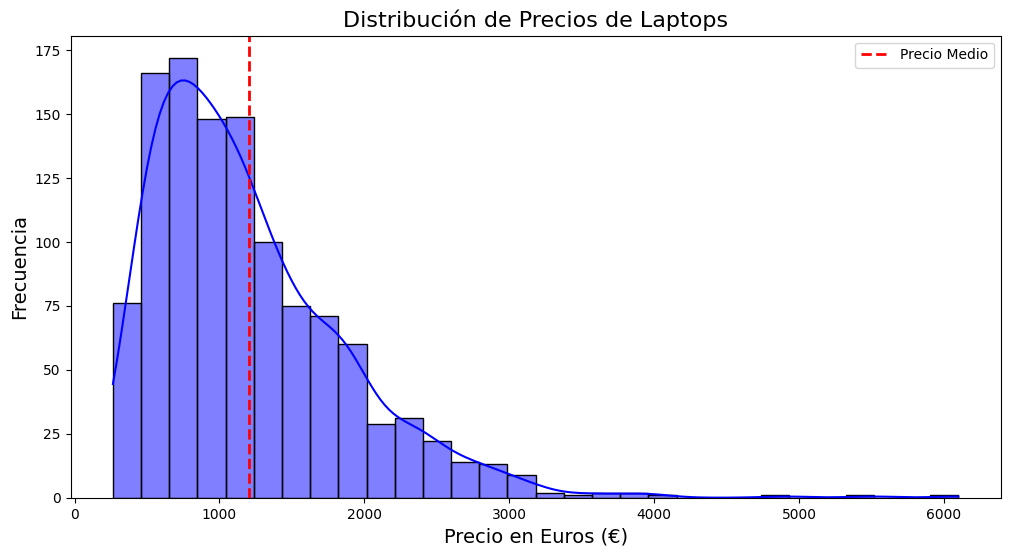

Muestra la distribución de precios de las laptops con una curva de densidad.


In [109]:
#DETERMINANDO LA DISTRIBUCIÓN DE LOS PRECIOS

plt.figure(figsize=(12, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios de Laptops', fontsize=16)
plt.xlabel('Precio en Euros (€)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.axvline(df['Price_euros'].mean(), color='red', linestyle='dashed', linewidth=2, label='Precio Medio')
plt.legend()
plt.show()
print('Muestra la distribución de precios de las laptops con una curva de densidad.')

<span style="color: #C586C0">**Podemos observar que no es una distribución normal ya que muestra una tendencia hacia la izquierda, con una media ligeramente por encima de los 1000 euros**</span>

In [67]:
#Determinando valor de Skweness
df['Price_euros'].skew()

np.float64(1.5984726947148369)

<span style="color: #C586C0">**Skew positivo de 1.598 indica una distribución sesgada a la derecha, lo que es importante tener en cuenta al interpretar y analizar los datos.**</span>

In [44]:
#Determinando valor de Kurtosis
df['Price_euros'].kurt()

np.float64(4.9145602034098435)

 <span style="color: #C586C0">**Kurtosis de 4.915 indica que la distribución es leptocúrtica, con colas más pesadas y una mayor propensión a la presencia de valores extremos. Esto es importante a tener en cuenta al analizar la distribución de los datos.**</span>

<span style="color:green">*Análisis de Variables Cuantitativas Mediante Gráficos*</span>

**Graficando relación Precio vs. Pulgadas**

In [110]:
Graf_1 = pd.concat([df['Price_euros'],Pulg],axis=1)
Graf_1.head(5)

,Price_euros,Inches
0,575.0,15.6
1,400.0,15.6
2,1495.0,14.0
3,770.0,14.0
4,393.9,15.6


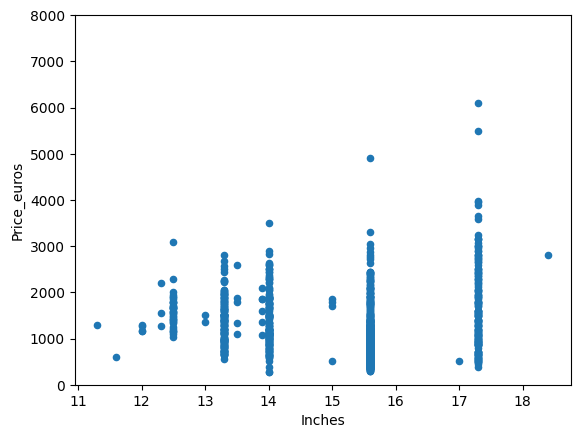

In [111]:
Graf_1['Inches'] = Graf_1['Inches'].astype(float)
Graf_1['Price_euros'] = Graf_1['Price_euros'].astype(float)

Graf_1.plot.scatter(x='Inches', y='Price_euros', ylim=(0, 8000));

**Graficando relación Precio vs. Ram**

In [112]:
Graf_2 = pd.concat([df['Price_euros'],Ram],axis=1)
Graf_2.head(5)

,Price_euros,Ram
0,575.0,8.0
1,400.0,4.0
2,1495.0,16.0
3,770.0,8.0
4,393.9,4.0


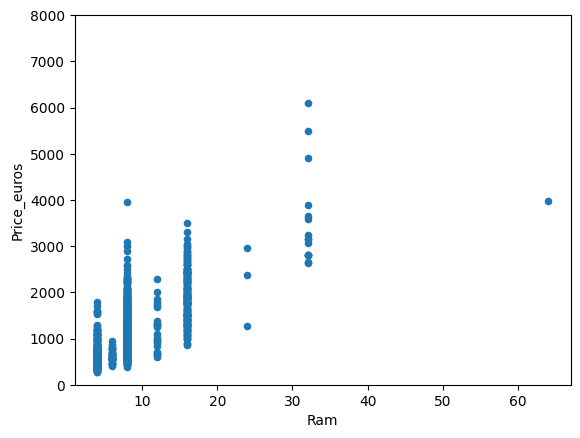

In [113]:

Graf_2['Ram'] = Graf_2['Ram'].astype(str)
Graf_2['Price_euros'] = Graf_2['Price_euros'].astype(float)
Graf_2['Ram'] = Graf_2['Ram'].astype(float)
Graf_2_sorted = Graf_2.sort_values(by='Ram')
Graf_2_sorted.plot.scatter(x='Ram', y='Price_euros', ylim=(0, 8000));

**Graficando relación Precio vs. Cpu Rate**

In [114]:
Graf_3 = pd.concat([df['Price_euros'],CpuR],axis=1)
Graf_3.head(5)

,Price_euros,Cpu Rate
0,575.0,2.5
1,400.0,NaN
2,1495.0,1.8
3,770.0,1.6
4,393.9,2.5


(np.float64(-0.5), np.float64(22.5), np.float64(0.0), np.float64(8000.0))

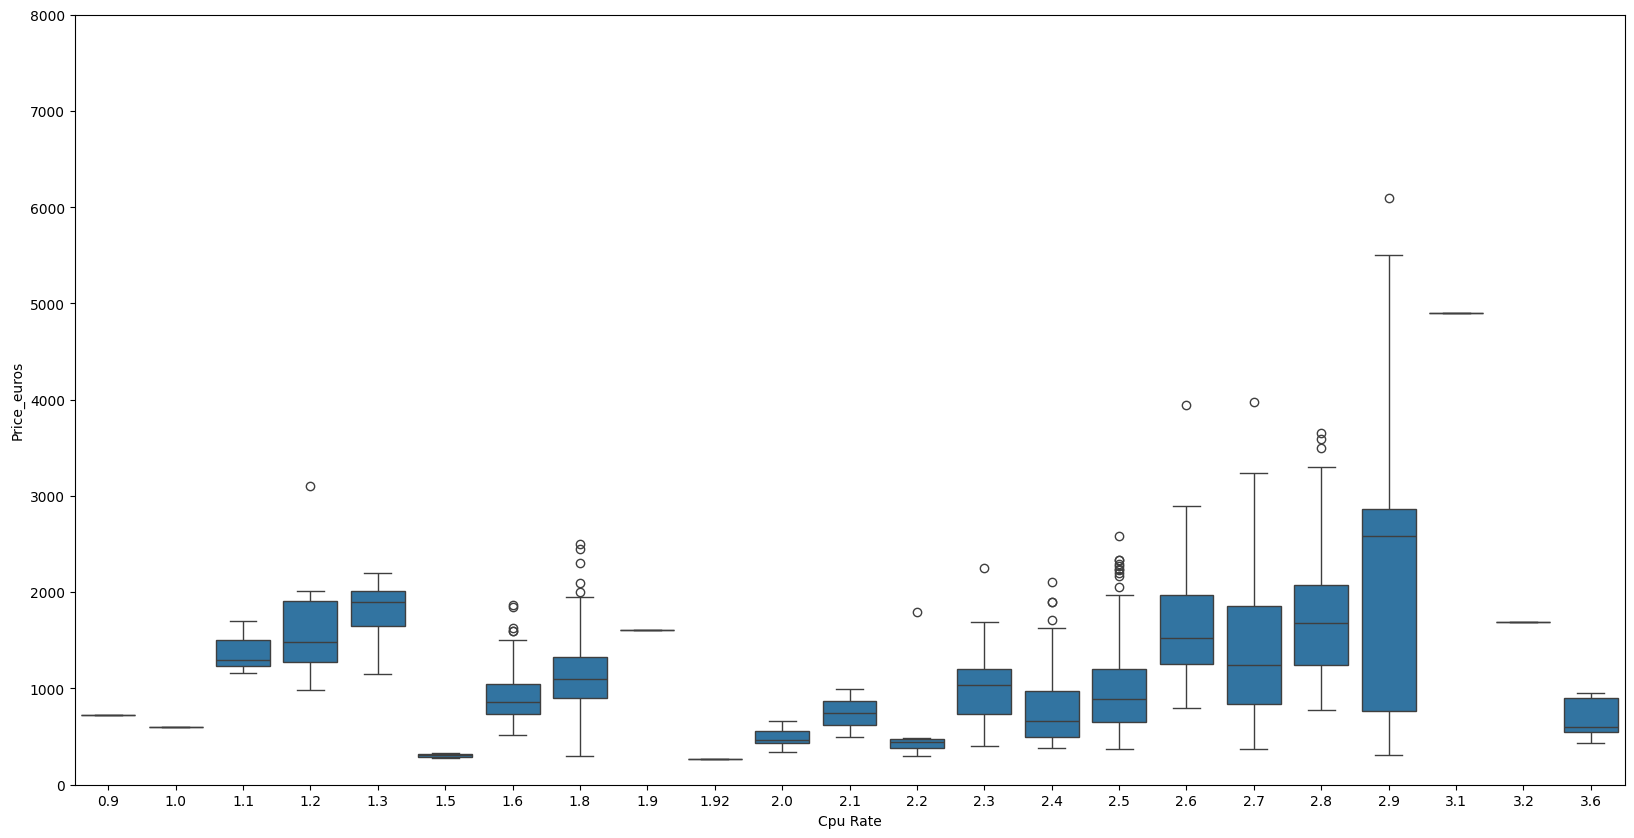

In [115]:
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=CpuR , y=df['Price_euros'] , data=Graf_3)
fig.axis(ymin=0 , ymax=8000)

**Graficando relación Precio vs. SSD**

In [116]:
Graf_4 = pd.concat([df['Price_euros'],SSD],axis=1)
Graf_4.head(5)

,Price_euros,SSD
0,575.0,256
1,400.0,0
2,1495.0,512
3,770.0,256
4,393.9,0


(np.float64(-0.5), np.float64(8.5), np.float64(0.0), np.float64(8000.0))

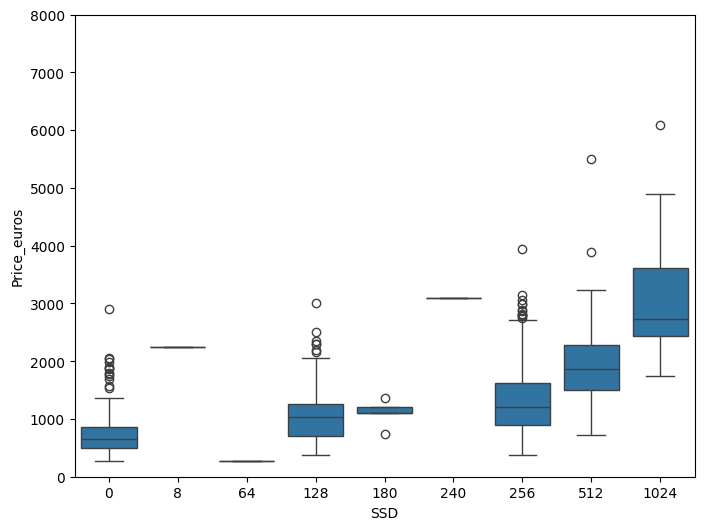

In [117]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=SSD , y=df['Price_euros'] , data=Graf_4)
fig.axis(ymin=0 , ymax=8000)

**Graficando relación Precio vs. HDD**

In [118]:
Graf_5 = pd.concat([df['Price_euros'],HDD],axis=1)
Graf_5.head(5)

,Price_euros,HDD
0,575.0,0
1,400.0,500
2,1495.0,0
3,770.0,0
4,393.9,500


(np.float64(-0.5), np.float64(6.5), np.float64(0.0), np.float64(8000.0))

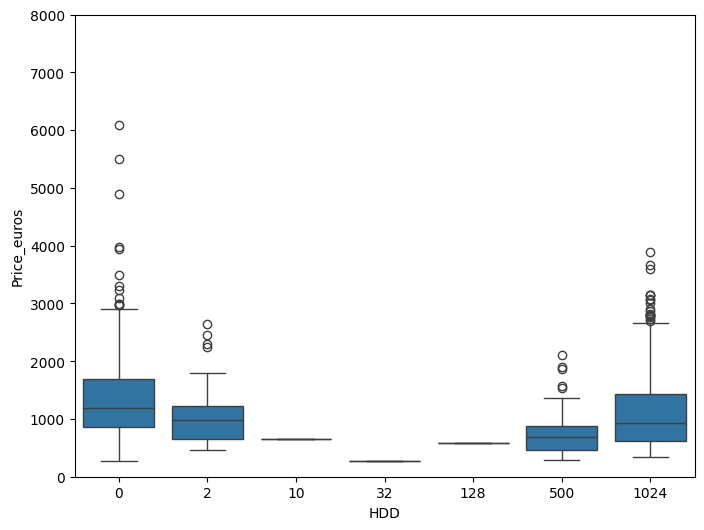

In [119]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=HDD , y=df['Price_euros'] , data=Graf_5)
fig.axis(ymin=0 , ymax=8000)

**Generando un mapa de calor para evaluar la relacion que guarda el precio con el resto de variables cuantitativas**

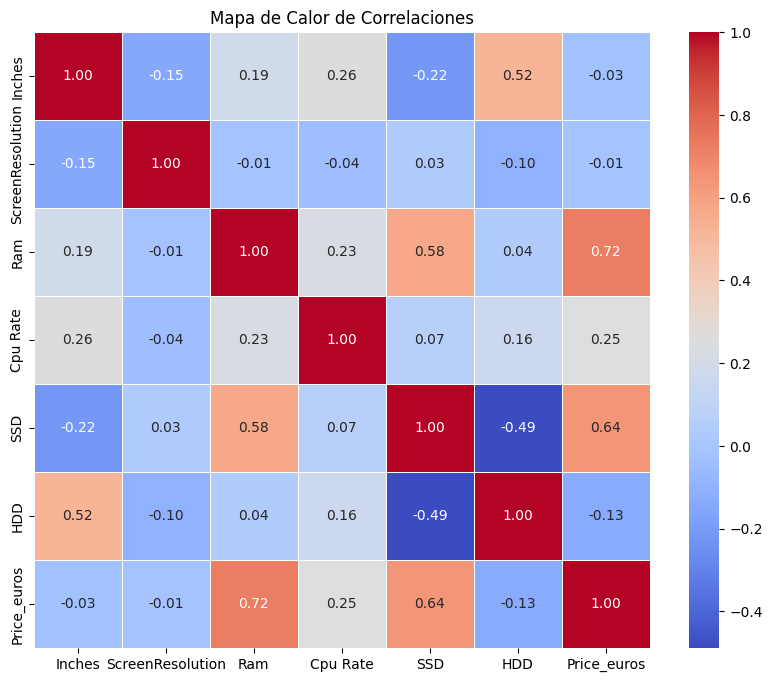

In [123]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configuración del mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

# Títulos y etiquetas
plt.title('Mapa de Calor de Correlaciones')
plt.show()

<span style="color: #C586C0">****Por lo observado anteriormente, en cuanto a los Atributos cuantitativos, no se encuentra una relacion determinante con respecto del precio. La capacidad de memoria RAM es la que mayor relación guarda con el precio alcanzando los 0.72, mientras la capacidad de la SSD se ubica en el el segundo lugar llegando a los 0.64, seguido por muy lejos por la capacidad de refresco del CPU que cuenta con el 0.25. Con esto podemos concluir que las principales caracteristicas cuantitativas que influyen en los precios son la capacidad de RAM y SSD****</span>

<span style="color:green">*Análisis de Variables Cualitativas Mediante Gráficos*</span>

**EXTRACCIÓN DE DATA Y LIMPIEZA  DE DATOS PARA USAR SOLO VARIABLES CUANTITATIVAS**

In [147]:
#Extraer DataFrame Original:
url = 'https://raw.githubusercontent.com/JosemaTelCa/ProyectoCoder/refs/heads/main/Laptop-Price.csv'
df_cuali= pd.read_csv(url, sep = ',')
# Eliminar las columnas que no aportan al analisis:
cols_to_drop = [1,3,4,5,9,10,11,12,13,16]
df_cuali= df_cuali.drop(df_cuali.columns[cols_to_drop], axis=1)

print('Exploracion Inicial(primeras 5 filas):')
df_cuali.head()

Exploracion Inicial(primeras 5 filas):


,Company,TypeName,OpSys,Cpu Brand,Cpu Model,Gpu Brand,Gpu Model,Price_euros
0,HP,Notebook,No OS,Intel,Core i5 7200U,Intel,HD Graphics 620,575.0
1,Acer,Notebook,Windows 10,AMD,A9-Series 9420,AMD,Radeon R5,400.0
2,Asus,Ultrabook,Windows 10,Intel,Core i7 8550U,Nvidia,GeForce MX150,1495.0
3,Acer,Ultrabook,Windows 10,Intel,Core i5 8250U,Intel,UHD Graphics 620,770.0
4,HP,Notebook,No OS,Intel,Core i5 7200U,Intel,HD Graphics 620,393.9


**Gráfico de Relación Precio vs. Compañia:**

C:\Users\User\AppData\Local\Temp\ipykernel_4896\2804703002.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_cuali, x='Company', y='Price_euros', estimator='mean', ci=None)


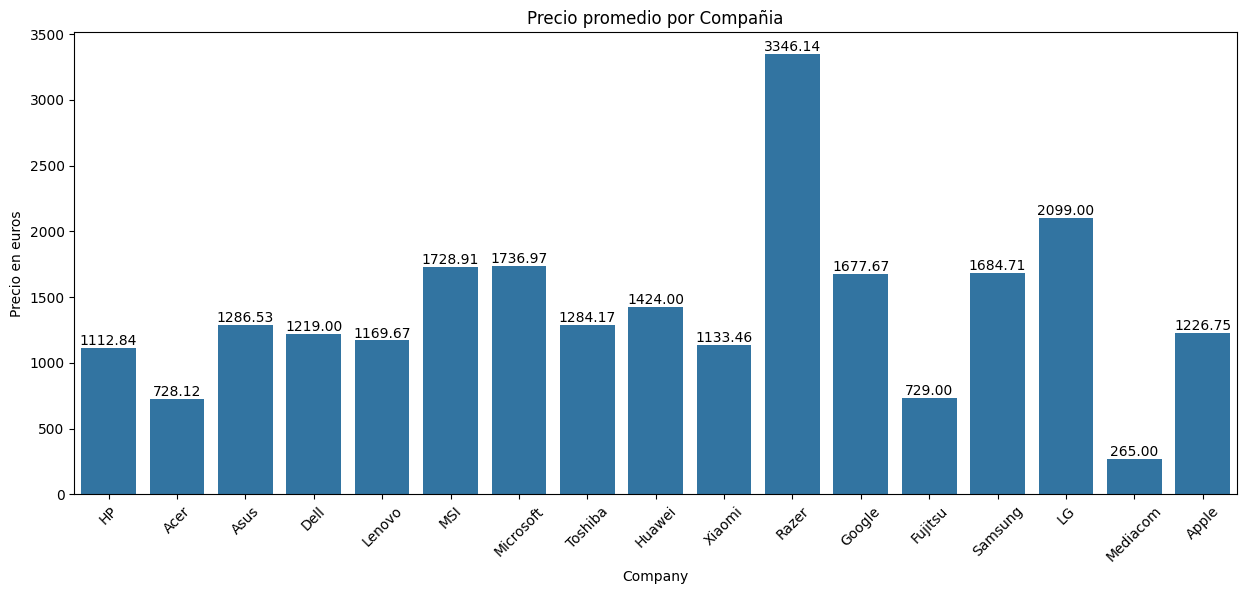

In [148]:
# Gráfico de barras para la relación entre el precio y la Compañia
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_cuali, x='Company', y='Price_euros', estimator='mean', ci=None)
plt.title('Precio promedio por Compañia')
plt.xlabel('Company')
plt.ylabel('Precio en euros')
plt.xticks(rotation=45)

# Agregar los valores de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

<span style="color: #C586C0">*Podemos observar que existe una marcda diferencia en el precio promedio de la Compañia Razer que es superior comparada con el resto, mientras que la compañia con el precio promedio más bajo es Mediacom*</span>

**Gráfico de Relación Precio vs. Tipo de Equipo:**

C:\Users\User\AppData\Local\Temp\ipykernel_4896\3083930716.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_cuali, x='TypeName', y='Price_euros', estimator='mean', ci=None)


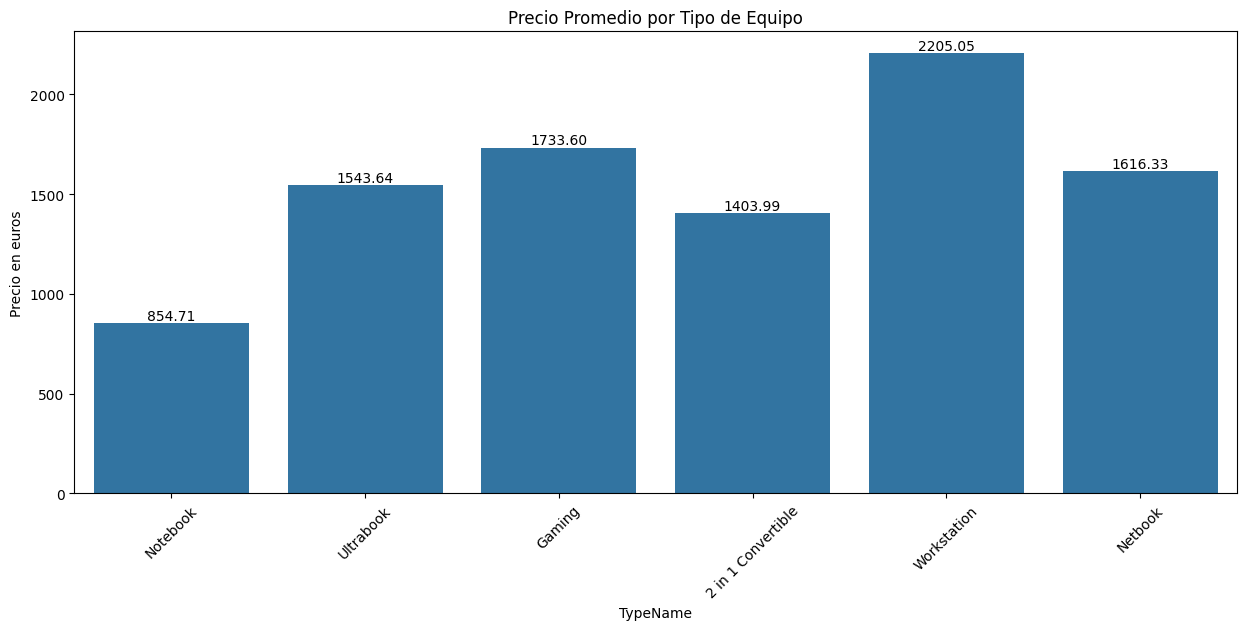

In [162]:
# Gráfico de barras para la relación entre el precio y el Tipo de equipo
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_cuali, x='TypeName', y='Price_euros', estimator='mean', ci=None)
plt.title('Precio Promedio por Tipo de Equipo')
plt.xlabel('TypeName')
plt.ylabel('Precio en euros')
plt.xticks(rotation=45)

# Agregar los valores de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

<span style="color: #C586C0">*Podemos observar que el precio promedio según el tipo de producto no muestra una diferencia muy marcada, teniendo como dominante las Worstation y a las Notebook en la cola*</span>

**Gráfico de Relación Precio vs. Sistema Operativo:**

C:\Users\User\AppData\Local\Temp\ipykernel_4896\3271869280.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_cuali, x='OpSys', y='Price_euros', estimator='mean', ci=None)


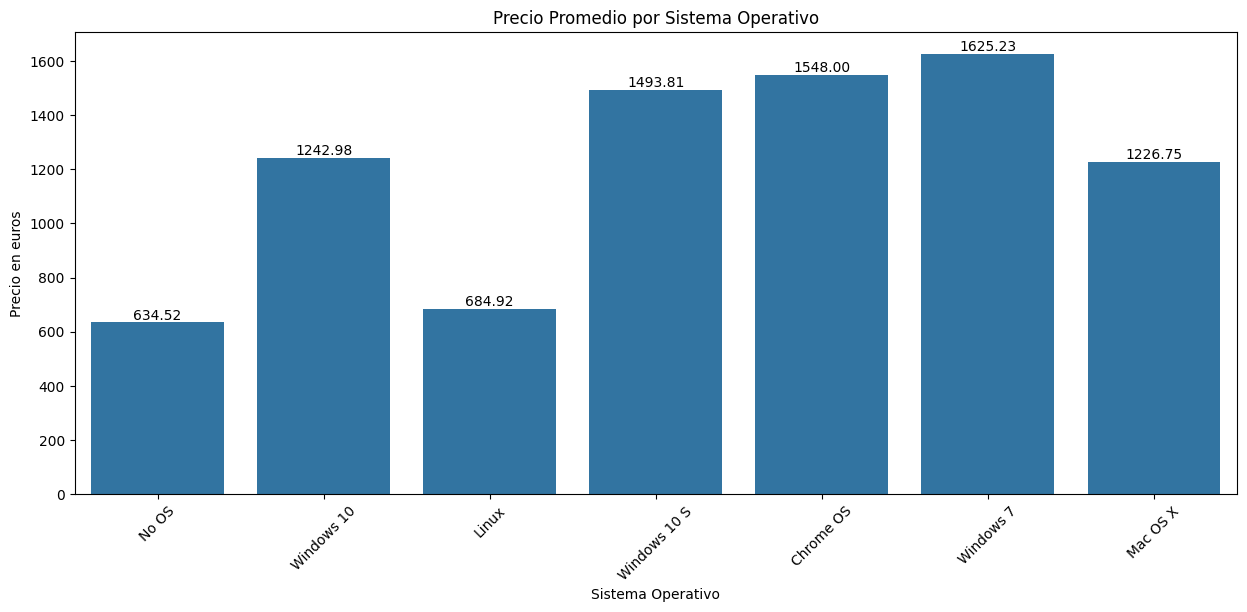

In [159]:
# Gráfico de barras para la relación entre el precio y el Tipo de equipo
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_cuali, x='OpSys', y='Price_euros', estimator='mean', ci=None)
plt.title('Precio Promedio por Sistema Operativo')
plt.xlabel('Sistema Operativo')
plt.ylabel('Precio en euros')
plt.xticks(rotation=45)

# Agregar los valores de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

<span style="color: #C586C0">*Podemos observar que existen 3 sistemas que lideran la grafica y no tienen una diferencia marcada entre ellos*</span>

**Gráfico de Relación Precio vs. Marca del Procesador:**

C:\Users\User\AppData\Local\Temp\ipykernel_4896\1569894757.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_cuali, x='Cpu Brand', y='Price_euros', estimator='mean', ci=None)


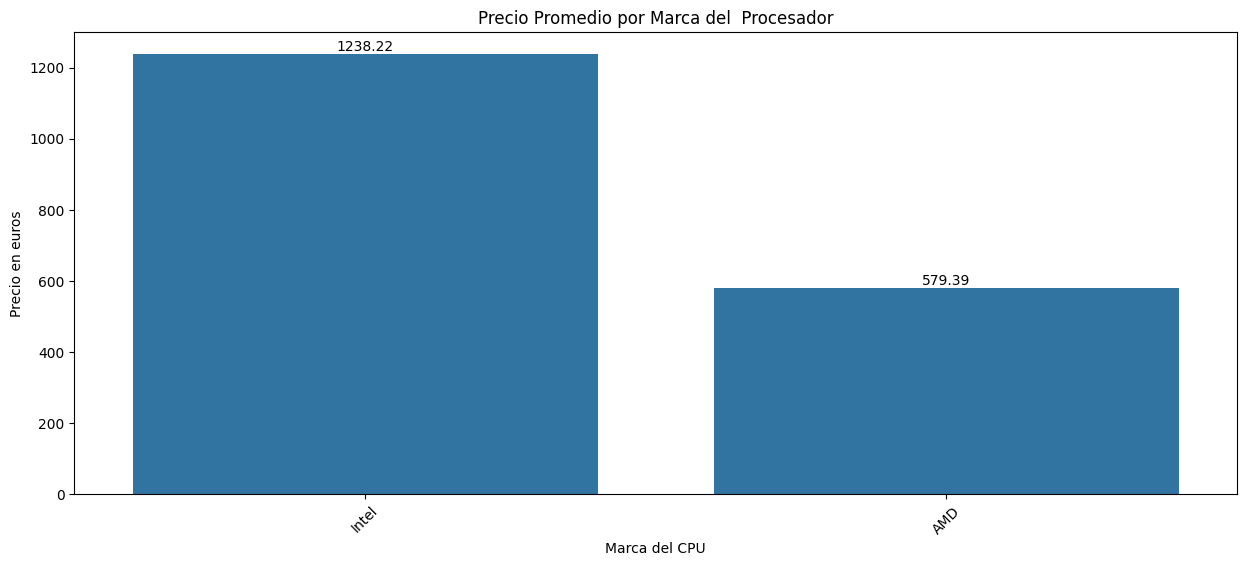

In [161]:
# Gráfico de barras para la relación entre el precio y el Tipo de equipo
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_cuali, x='Cpu Brand', y='Price_euros', estimator='mean', ci=None)
plt.title('Precio Promedio por Marca del  Procesador')

plt.xlabel('Marca del CPU')
plt.ylabel('Precio en euros')
plt.xticks(rotation=45)

# Agregar los valores de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

<span style="color: #C586C0">*Podemos observar que la marca Intel tiene precios mayores a la marca AMD*</span>

**Gráfico de Relación Precio vs. Modelo del Procesador:**

C:\Users\User\AppData\Local\Temp\ipykernel_4896\695009571.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_cuali, x='Cpu Model', y='Price_euros', estimator='mean', ci=None)


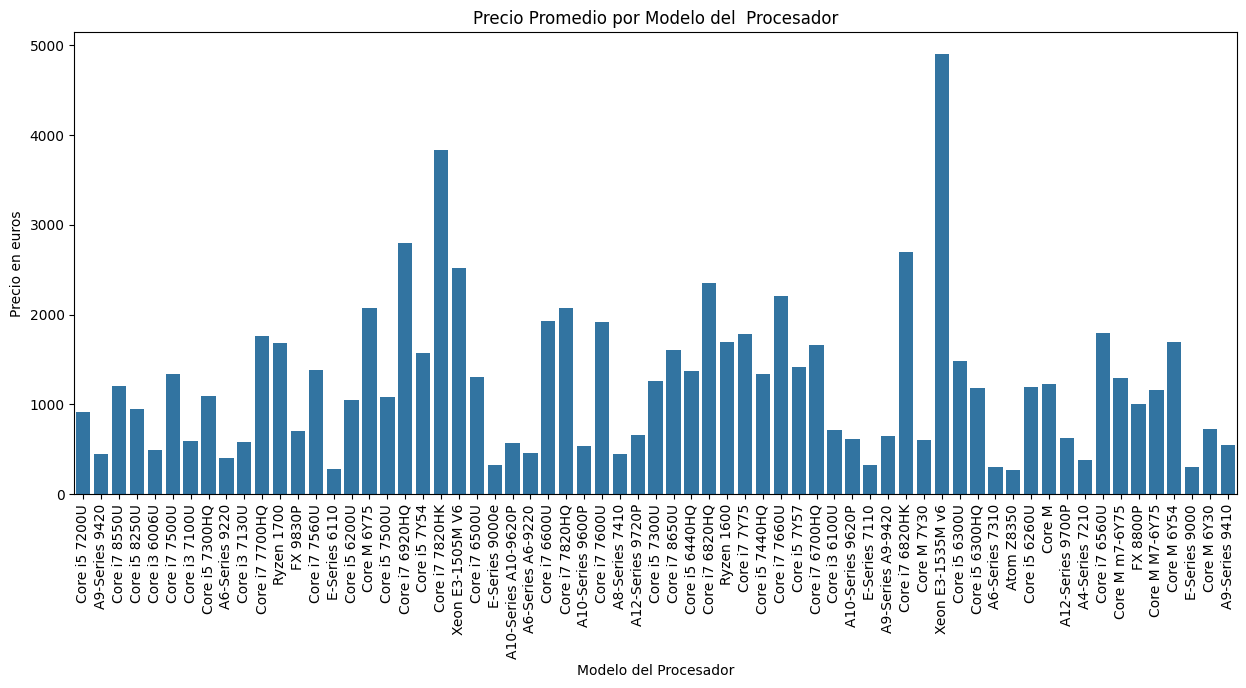

In [165]:
# Gráfico de barras para la relación entre el precio y el Tipo de equipo
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_cuali, x='Cpu Model', y='Price_euros', estimator='mean', ci=None)
plt.title('Precio Promedio por Modelo del  Procesador')

plt.xlabel('Modelo del Procesador')
plt.ylabel('Precio en euros')
plt.xticks(rotation=90)
plt.show()

<span style="color: #C586C0">*Podemos observar que en cuanto al modelo del procesador exixte una variabilidad muy marcada*</span>

**Dado que las Variables Cualitativas no arrojan resultados marcados salvo en algunos casos, optamos por trabajar solo con las variables Cuantitativas, de las cuales segun lo evaluado anteriormente , tenemos 2 que son determinates para el el precio**

<span style="color:yellow">**III. Evaluación del Modelo Mediante Algoritmo de Regresión**</span>

In [205]:
#Definiendo la variable dependiente (target) y las variables independientes (features):

X = df[['Ram', 'SSD']]  # Variables independientes
y = df['Price_euros']   # Variable dependiente

In [204]:
# Dividiendo datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo (80 / 20) :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Selección del modelo de regresión:

from sklearn.linear_model import LinearRegression

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [212]:
print(X_test.shape) 
print(X_test.head())


(230, 2)
      Ram  SSD
218   4.0    0
809   8.0  256
501   8.0    0
649  16.0  256
323   8.0  128


In [214]:
#Utilizar el modelo para hacer predicciones sobre el conjunto de prueba:
y_pred = model.predict(X_test)
if len(y_pred) == 0:
    print("No se generaron predicciones.")
else:
    print("Predicciones generadas:", y_pred)

Predicciones generadas: [ 625.51915942 1215.59285812  895.05486391 1754.66426709 1055.32386101
 2832.80708503  895.05486391 1215.59285812 1215.59285812 2075.2022613
 1055.32386101 1215.59285812  625.51915942 2075.2022613   895.05486391
 1055.32386101 1754.66426709  625.51915942 1215.59285812 3153.34507924
  625.51915942 1536.13085233 1215.59285812  625.51915942  895.05486391
  625.51915942 1215.59285812 2075.2022613  1055.32386101  920.55600877
  946.05715363  625.51915942 1215.59285812  625.51915942 1055.32386101
 1536.13085233 1215.59285812  895.05486391 1215.59285812 1055.32386101
  625.51915942 1055.32386101  895.05486391 1754.66426709 2075.2022613
 1215.59285812 1754.66426709  895.05486391 1164.59056839  895.05486391
 2075.2022613   625.51915942 1536.13085233 1215.59285812 1215.59285812
 1594.39526998  895.05486391  625.51915942 1055.32386101  760.28701166
 2716.27824972  625.51915942 1536.13085233 1754.66426709  625.51915942
 1536.13085233 1754.66426709  895.05486391 1594.3952699

In [215]:
# Evalúar el rendimiento del modelo usando métricas como el error cuadrático medio (MSE) y R²
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 157624.88507346506
R²: 0.6740515629882746


<span style="color: #C586C0">*El coeficiente de determinación R² = 0.67 indica que aproximadamente el 67% de la variabilidad en los precios de los productos puede ser explicada por las variables independientes RAM y SSD. Esto significa que hay una relación moderada a fuerte entre estas variables y el precio, pero hay otros factores que también pueden influir en el precio que no se están considerando en el modelo. En este caso podria decirse según lo visto con las variables cualitativas, que la Compañia y La Marca del procesador son por ejemplo factores que tambien intervienen*</span>

In [217]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE (Random Forest): {mse_rf}')

MSE (Random Forest): 157094.684792551


**Grafica de Prueba Vs Realidad**

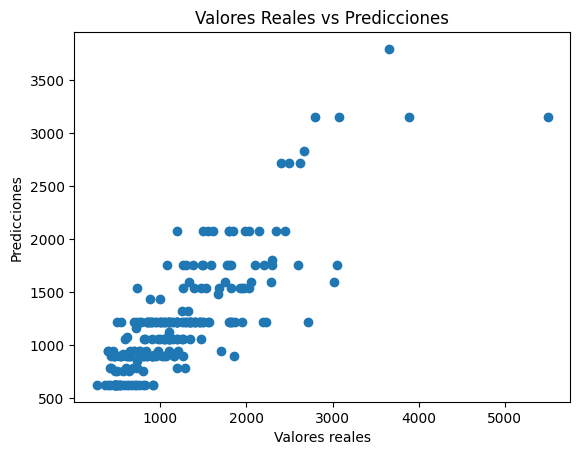

In [216]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


<span style="color:yellow">**IV. Conclusiones**</span>

* **Las Variables cuantitativas más determiantes son la capacidad de RAM y SSD.**
* **Las Variables Cuantitativas que menos intervienen en el precio son la resolución, la pantalla y la capacidad del HDD.**
* **Las  Variables Cualitativas que mayor impacto tienen con el precio, son las relacionadas al procesador.**
* **El modelo con R² del 67% es aceptable pero no  es el mejor modelo, por lo que habría que evaluar más variables para alcanzar por lo menos un 85%.**
* **Hace falta más variables cuantitativas, ya que las cualitativas no arrojan diferencias significativas en los precios salvo casos puntuales. Por ejemplo, podríamos considerar la capacidad de la GPU en lugar del modelo o marca.**


